<br>
<h1><center><b>Primeiro Trabalho de Inteligência Artificial</b></center></h1>

<h1><center>Ciência da Computação</center></h1>
<h2><center>Inteligência Artificial - 2023/1</center></h2>



<h4><center>

  <p>
  Filipe Gomes Arante de Souza </br>
  filipe.ga.souza@edu.ufes.br</br>
  2020100625 
  </p>

</center></h4>

</br>

<h5><center>Professor: Flávio Miguel Varejão</center></h5>

<br>

<br>

---

# Importação de bibliotecas utilizadas

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from scipy import stats
from scipy.stats import ttest_rel, wilcoxon

# Importação da base de dados

In [16]:
def readDataset():
  # Leitura dos dados para o pandas.
  df = pd.read_csv('https://raw.githubusercontent.com/VitorBonella/PL-Dataset/main/dataset.csv',sep=";") 
  df.set_index('id', inplace = True) # Transformando a coluna id no índice da tabela.

  # Juntando tipo_lampada e potência numa só coluna para formar as classes.
  df['classe'] = df['tipo_lampada'].str.replace(" ", "") + df['potencia'].astype(str) 

  # Lista de Índices
  FOURIER = ['df01', 'df02', 'df03', 'df04','df05', 'df06', 'df07', 'df08', 'df09', 'df10']
  HU = ['i1', 'i2', 'i3', 'i4','i5', 'i6', 'i7']
  HARALICK = ['probmax', 'energia', 'entropia', 'contraste','homogeneidade', 'correlacao']
  ALL = FOURIER + HU + HARALICK

  # Transformando dados para float
  df[ALL] = df[ALL].apply(lambda x: x.str.replace(',', '.').astype(float), axis = 1) 

  # Selecionando descritores conforma número de matrícula.
  # No meu caso, tenho final 5, então serão utilizados os descritores de Fourier e Hu.
  X = df[FOURIER + HU]
  y = df['classe']
  return X, y

X, y = readDataset()


In [17]:
# Imprimindo dados
X

,df01,df02,df03,df04,df05,df06,df07,df08,df09,df10,i1,i2,i3,i4,i5,i6,i7
id,,,,,,,,,,,,,,,,,
355,0.087961,0.054059,0.025210,0.027471,0.012834,0.008374,0.004592,0.005163,0.004747,0.003075,0.168084,0.000615,0.000131,5.717751e-05,3.808159e-09,-1.417337e-06,3.153370e-09
356,0.018333,0.064192,0.021335,0.028935,0.012263,0.011230,0.003566,0.005862,0.003746,0.003779,0.164507,0.001087,0.000043,1.011576e-08,-5.395931e-15,-6.859661e-11,3.907229e-15
357,0.018215,0.052010,0.019937,0.027750,0.009354,0.010829,0.003828,0.006079,0.003583,0.002716,0.163434,0.000767,0.000042,5.386911e-09,-8.512721e-16,1.025674e-10,-2.417528e-15
358,0.052135,0.050285,0.045283,0.026933,0.023573,0.025529,0.009866,0.018346,0.010126,0.019193,0.194681,0.000430,0.000351,9.433074e-08,-4.535061e-13,-1.859019e-09,2.981211e-13
359,0.097783,0.049556,0.029332,0.025498,0.015147,0.007328,0.005753,0.004973,0.005666,0.002682,0.178424,0.000125,0.000788,4.385479e-04,2.487489e-07,-4.861444e-06,6.771579e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,0.033474,0.072775,0.034163,0.015214,0.010069,0.005106,0.010373,0.005512,0.009656,0.004213,0.171602,0.002627,0.000159,3.640445e-06,8.760447e-11,1.822845e-07,-3.202402e-12
657,0.014247,0.018475,0.015453,0.016090,0.008481,0.002325,0.003064,0.002381,0.001795,0.002140,0.172655,0.000261,0.000068,1.504726e-06,1.367720e-11,-6.451751e-09,6.681615e-12
658,0.003940,0.008809,0.005161,0.006331,0.004244,0.001916,0.001962,0.002432,0.002068,0.001842,0.177559,0.000174,0.000013,3.194222e-06,-5.618219e-12,3.521780e-08,1.995746e-11


In [18]:
# Imprimindo rótulos
y
print(set(y))

{'sodio150', 'metalica150', 'sodio70', 'sodio250', 'sodio400', 'mercurio125', 'sodio100', 'metalica250', 'metalica400'}


# Classificador ZeroR

In [19]:
# Função que calcula média, desvio padrão e intervalo de confiança a 95% dos scores obtidos
# num cross validation. Ela imprime esses valores e retorna um dataframe com esses mesmos dados.
def print_results(scores, methodName):
  mean = scores.mean()
  std = scores.std()
  inf, sup = stats.norm.interval(0.95, loc=mean, scale=std/np.sqrt(len(scores)))

  print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
  print("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (inf, sup))

  df = pd.DataFrame(data = [[methodName, mean, std, inf, sup]], columns = ['Método', 'Média', 'Desvio Padrão', 'Limite Inferior', 'Limite Superior']) 
  return df

zeroR = DummyClassifier(random_state = 11)

scalar = StandardScaler()
pipeline = Pipeline([('transformer', scalar), ('estimator', zeroR)])
rkf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 36851234)

zeroRScores = cross_val_score(pipeline, X, y, scoring = 'accuracy', cv = rkf)

zeroRDF = print_results(zeroRScores, 'ZR')
zeroRDF



Mean Accuracy: 0.17 Standard Deviation: 0.01
Accuracy Confidence Interval (95%): (0.16, 0.17)



,Método,Média,Desvio Padrão,Limite Inferior,Limite Superior
0,ZR,0.165057,0.010883,0.161163,0.168952


# Classificador Bagging

In [20]:
bagging = BaggingClassifier(random_state = 11)

grade = {'estimator__n_estimators': [3, 9, 15, 21]}
scalar = StandardScaler()
pipeline = Pipeline([('transformer', scalar), ('estimator', bagging)])
gs = GridSearchCV(estimator = pipeline, param_grid = grade, scoring = 'accuracy', cv = 4)
rkf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 36851234)

baggingScores = cross_val_score(gs, X, y, scoring = 'accuracy', cv = rkf)

baggingDF = print_results(baggingScores, 'BA')
baggingDF



Mean Accuracy: 0.51 Standard Deviation: 0.10
Accuracy Confidence Interval (95%): (0.48, 0.55)



,Método,Média,Desvio Padrão,Limite Inferior,Limite Superior
0,BA,0.51318,0.102518,0.476495,0.549865


# Classificador AdaBoost

In [21]:
adaBoost = AdaBoostClassifier(random_state = 11)

scalar = StandardScaler()
pipeline = Pipeline([('transformer', scalar), ('estimator', adaBoost)])
grade = {'estimator__n_estimators': [3, 9, 15, 21]}
gs = GridSearchCV(estimator = pipeline, param_grid = grade, scoring = 'accuracy', cv = 4)
rkf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 36851234)

adaBoostScores = cross_val_score(gs, X, y, scoring='accuracy', cv = rkf)

adaBoostDF = print_results(adaBoostScores, 'AB')
adaBoostDF



Mean Accuracy: 0.27 Standard Deviation: 0.03
Accuracy Confidence Interval (95%): (0.26, 0.28)



,Método,Média,Desvio Padrão,Limite Inferior,Limite Superior
0,AB,0.266092,0.028426,0.25592,0.276264


# Classificador Random Forest

In [22]:
randomForest = RandomForestClassifier(random_state = 11)

scalar = StandardScaler()
pipeline = Pipeline([('transformer', scalar), ('estimator', randomForest)])
grade = {'estimator__n_estimators': [3, 9, 15, 21]}
gs = GridSearchCV(estimator = pipeline, param_grid = grade, scoring = 'accuracy', cv = 4)
rkf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 36851234)

randomForestScores = cross_val_score(gs, X, y, scoring='accuracy', cv = rkf)

randomForestDF = print_results(randomForestScores, 'RF')
randomForestDF



Mean Accuracy: 0.51 Standard Deviation: 0.09
Accuracy Confidence Interval (95%): (0.48, 0.54)



,Método,Média,Desvio Padrão,Limite Inferior,Limite Superior
0,RF,0.509923,0.093142,0.476593,0.543253


# Classificador Heterogeneous Pooling

## Implementação

In [23]:
class HeterogeneousPoolingClassifier(BaseEstimator):
    def __init__(self, n_samples = 3):
        super().__init__()
        self.n_samples = n_samples
    
    # Create and train all classifiers
    def __createClassifiers(self, X_train, y_train):
      self.__classifiers = []
      state = 0
      for i in range(self.n_samples):
        # Updating the train set to fit the current classifiers
        if i == 0:
          data, labels = X_train, y_train
        else:
          data, labels = resample(X_train, y_train, random_state = state)
          state += 1
        
        # Initializing the current classifiers
        knn = KNeighborsClassifier()
        dt = DecisionTreeClassifier(random_state = 11)
        nb = GaussianNB()

        # Fitting the current classifiers
        knn.fit(data, labels)
        dt.fit(data, labels)
        nb.fit(data, labels)

        # Inserting into the combined classifiers
        self.__classifiers.append(knn)
        self.__classifiers.append(dt)
        self.__classifiers.append(nb)
      return
    
    # Sorts the classes in drecreasing order according its frequencies in the dataset.
    def __sortClassesByFrequency(self, y_train):
      classes, frequency = np.unique(y_train, return_counts = True)
      self.__ordered_classes = [x for _, x in sorted(zip(frequency, classes), reverse = True)]
      return

    # Given a few tied classes in max_votes, return the most frequent in the train set.
    def __tieBreaker(self, max_votes):
      for label in self.__ordered_classes:
        if label in max_votes:
          return label
      return

    def fit(self, X_train, y_train):
      self.__createClassifiers(X_train, y_train)
      self.__sortClassesByFrequency(y_train)
      return
      
    def predict(self, X_test):
      result = [] # List of predictions
      for test in X_test:
        votes = {}
        for classifier in self.__classifiers:
          [predicted] = classifier.predict([test])

          # Computing the vote
          if predicted in votes:
            votes[predicted] += 1
          else:
            votes[predicted] = 1

        # Taking the most voted classes
        max_votes = [key for key, value in votes.items() if value == max(votes.values())]

        if len(max_votes) == 1: # Only one most voted classe
          [predicted] = max_votes
          result.append(predicted)
        else: # Tie between two or more classes
          predicted = self.__tieBreaker(max_votes)
          result.append(predicted)
      
      return result
      

## Utilizando o classificador

In [24]:
heterogeneousPooling = HeterogeneousPoolingClassifier()

scalar = StandardScaler()
pipeline = Pipeline([('transformer', scalar), ('estimator', heterogeneousPooling)])
grade = {'estimator__n_samples': [1, 3, 5, 7]}
gs = GridSearchCV(estimator = pipeline, param_grid = grade, scoring = 'accuracy', cv = 4)
rkf = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 36851234)

heterogeneousPoolingScores = cross_val_score(gs, X, y, scoring='accuracy', cv = rkf)

heterogeneousPoolingDF = print_results(heterogeneousPoolingScores, 'HP')
heterogeneousPoolingDF



Mean Accuracy: 0.46 Standard Deviation: 0.08
Accuracy Confidence Interval (95%): (0.43, 0.49)



,Método,Média,Desvio Padrão,Limite Inferior,Limite Superior
0,HP,0.461494,0.081464,0.432343,0.490645


# Informações sobre a acurácia dos classificadores

In [25]:
info = pd.concat([zeroRDF, baggingDF, adaBoostDF, randomForestDF, heterogeneousPoolingDF]).reset_index(drop = True)
info


,Método,Média,Desvio Padrão,Limite Inferior,Limite Superior
0,ZR,0.165057,0.010883,0.161163,0.168952
1,BA,0.513180,0.102518,0.476495,0.549865
2,AB,0.266092,0.028426,0.255920,0.276264
3,RF,0.509923,0.093142,0.476593,0.543253
4,HP,0.461494,0.081464,0.432343,0.490645


# Teste T Pareado e Teste de Wilcoxon

In [26]:
def TTestWilcoxonTestBetweenScores(methodsScores):
  data = []
  for i_index, i_method in enumerate(methodsScores):
    row = []
    for j_index, j_method in enumerate(methodsScores):
      if i_method == j_method: # Main diagonal
        row.append(i_method[0])

      elif j_index > i_index: # Upper triangular
        s, p = ttest_rel(i_method[1], j_method[1])
        row.append(p)

      elif j_index < i_index: # Lower triangular
        s, p = wilcoxon(i_method[1], j_method[1], method = 'approx') # Method approx to not give warning
        row.append(p)
    data.append(row)

  df = pd.DataFrame(data)
  return df

methodsScores = [
    ('ZR', zeroRScores), 
    ('BA', baggingScores), 
    ('AB', adaBoostScores), 
    ('RF', randomForestScores), 
    ('HP', heterogeneousPoolingScores)
]

TTestWilcoxonTestDF = TTestWilcoxonTestBetweenScores(methodsScores)
TTestWilcoxonTestDF


,0,1,2,3,4
0,ZR,0.0,0.0,0.0,0.0
1,0.000002,BA,0.0,0.842035,0.000252
2,0.000001,0.000002,AB,0.0,0.0
3,0.000002,0.913692,0.000002,RF,0.004076
4,0.000002,0.001473,0.000002,0.00434,HP


# Boxplots da acurárias dos folds de cada classificador

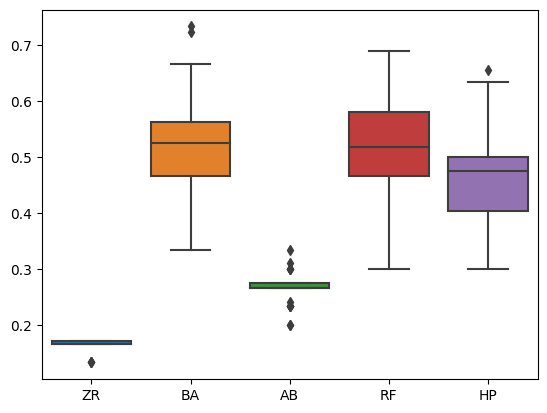

In [27]:
def boxplotClassifiers(methodsScores):
  data = [x for _, x in methodsScores]
  df = pd.DataFrame(data).transpose()
  df.columns = [x for x, _ in methodsScores]
  sns.boxplot(data = df)
  plt.show()

boxplotClassifiers(methodsScores)
